# Import bibliotek

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler

# Wybranie datasetu

In [113]:
def choose_dataset(train_data, test_data):
    train_data = train_data
    test_data = test_data
    return train_data, test_data

In [114]:
x = pd.read_csv("data/data2008.csv")
y = pd.read_csv('data/data2009.csv')

In [115]:
if (len(x)) > len(y):
    x = x[:len(y)]
else:
    y = y[:len(x)]

# Sprawdzenie istnienia brakujących wartości

In [116]:
x = x[x["RainTomorrow"].notna()]
y = y[y["RainTomorrow"].notna()]

# Odrzucanie wartości wysoce skorelowanych i niewaznych

In [117]:
x = x.drop(['Temp3pm', 'Temp9am', 'Humidity9am','WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)
y = y.drop(['Temp3pm', 'Temp9am', 'Humidity9am', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)

# Wyświetl wartości kategoryczne i liczbowe

In [118]:
categorical = [col for col in x.columns if x[col].dtypes == 'O']

categorical

['Location', 'RainToday', 'RainTomorrow']

In [119]:
numerical = [col for col in x.columns if x[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Latitude',
 'Longitude',
 'Year',
 'Month',
 'Day']

In [120]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'RainToday', 'RainTomorrow', 'Latitude', 'Longitude',
       'Year', 'Month', 'Day'],
      dtype='object')

# Podział danych

In [121]:
X = x.drop(['RainTomorrow'], axis=1)

y = y['RainTomorrow']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((1816, 16), (454, 16))

# Zakodowanie zmiennej RainToday

In [123]:
encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

# Utworzenie zbioru treningowego.

In [124]:
print(X_train.columns)

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'RainToday_0', 'RainToday_1', 'Latitude', 'Longitude',
       'Year', 'Month', 'Day'],
      dtype='object')


In [125]:
numerical = [col for col in numerical if col not in ['Humidity9am', 'Temp9am', 'Temp3pm']]

X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location)], axis=1)

# Utworzenie zbioru testowego.

In [126]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                    pd.get_dummies(X_test.Location)], axis=1)

In [127]:
cols = X_train.columns

In [128]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [129]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [130]:
X_test = pd.DataFrame(X_test, columns=[cols])

# Trenowanie modelu

In [131]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# Kodowanie zmiennych kategorycznych

In [132]:
'''from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cleaned_data['Location'] = le.fit_transform(cleaned_data['Location'])
cleaned_data['WindDir9am'] = le.fit_transform(cleaned_data['WindDir9am'])
cleaned_data['WindDir3pm'] = le.fit_transform(cleaned_data['WindDir3pm'])
cleaned_data['WindGustDir'] = le.fit_transform(cleaned_data['WindGustDir'])
'''

"from sklearn import preprocessing\nle = preprocessing.LabelEncoder()\ncleaned_data['Location'] = le.fit_transform(cleaned_data['Location'])\ncleaned_data['WindDir9am'] = le.fit_transform(cleaned_data['WindDir9am'])\ncleaned_data['WindDir3pm'] = le.fit_transform(cleaned_data['WindDir3pm'])\ncleaned_data['WindGustDir'] = le.fit_transform(cleaned_data['WindGustDir'])\n"

In [133]:
X_train.columns

MultiIndex([(      'MinTemp',),
            (      'MaxTemp',),
            (     'Rainfall',),
            ('WindGustSpeed',),
            ( 'WindSpeed9am',),
            ( 'WindSpeed3pm',),
            (  'Humidity3pm',),
            (  'Pressure9am',),
            (  'Pressure3pm',),
            (     'Latitude',),
            (    'Longitude',),
            (         'Year',),
            (        'Month',),
            (          'Day',),
            (  'RainToday_0',),
            (  'RainToday_1',),
            (     'Adelaide',),
            (       'Albany',),
            (       'Albury',),
            ( 'AliceSprings',),
            (     'Ballarat',),
            (      'Bendigo',),
            (     'Brisbane',),
            (       'Cairns',),
            (     'Canberra',),
            (       'Darwin',),
            (    'GoldCoast',),
            (       'Hobart',),
            (   'Launceston',),
            (    'Melbourne',),
            ( 'MountGambier',),
        

# Predykcja wyników

In [134]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', '

In [135]:
logreg.predict_proba(X_test)[:, 0]

array([0.80337882, 0.81586378, 0.82884331, 0.87037057, 0.76645729,
       0.70061734, 0.49568859, 0.8825858 , 0.75976212, 0.87329845,
       0.73538314, 0.77257475, 0.8161262 , 0.71612717, 0.86428839,
       0.80125631, 0.79876224, 0.82025498, 0.81934556, 0.75949835,
       0.84588699, 0.72055968, 0.85593511, 0.85913   , 0.91638987,
       0.80061047, 0.82453326, 0.69574427, 0.90650802, 0.72950277,
       0.76204285, 0.66745353, 0.85284025, 0.83604193, 0.91830115,
       0.78295838, 0.81516631, 0.78203115, 0.74804932, 0.76693587,
       0.84940377, 0.77214268, 0.82783353, 0.54211486, 0.91803192,
       0.89410129, 0.69764903, 0.86497266, 0.90667106, 0.8614064 ,
       0.80266351, 0.65631083, 0.88932172, 0.89350242, 0.71505341,
       0.73209236, 0.83269317, 0.7750913 , 0.76450836, 0.67235165,
       0.93377892, 0.88641733, 0.92433016, 0.63124353, 0.90951737,
       0.8971265 , 0.76659928, 0.85370394, 0.9342366 , 0.8184032 ,
       0.53938152, 0.74473969, 0.78336363, 0.88333204, 0.90233

In [136]:
logreg.predict_proba(X_test)[:, 1]

array([0.19662118, 0.18413622, 0.17115669, 0.12962943, 0.23354271,
       0.29938266, 0.50431141, 0.1174142 , 0.24023788, 0.12670155,
       0.26461686, 0.22742525, 0.1838738 , 0.28387283, 0.13571161,
       0.19874369, 0.20123776, 0.17974502, 0.18065444, 0.24050165,
       0.15411301, 0.27944032, 0.14406489, 0.14087   , 0.08361013,
       0.19938953, 0.17546674, 0.30425573, 0.09349198, 0.27049723,
       0.23795715, 0.33254647, 0.14715975, 0.16395807, 0.08169885,
       0.21704162, 0.18483369, 0.21796885, 0.25195068, 0.23306413,
       0.15059623, 0.22785732, 0.17216647, 0.45788514, 0.08196808,
       0.10589871, 0.30235097, 0.13502734, 0.09332894, 0.1385936 ,
       0.19733649, 0.34368917, 0.11067828, 0.10649758, 0.28494659,
       0.26790764, 0.16730683, 0.2249087 , 0.23549164, 0.32764835,
       0.06622108, 0.11358267, 0.07566984, 0.36875647, 0.09048263,
       0.1028735 , 0.23340072, 0.14629606, 0.0657634 , 0.1815968 ,
       0.46061848, 0.25526031, 0.21663637, 0.11666796, 0.09766

# Dokładność

In [137]:
print('Model accuracy score: {0:0.4f}'. format(
    accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8282


# Macierz pomyłek

In [138]:
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0, 0])

print('\nTrue Negatives(TN) = ', cm[1, 1])

print('\nFalse Positives(FP) = ', cm[0, 1])

print('\nFalse Negatives(FN) = ', cm[1, 0])

Confusion matrix

 [[374   0]
 [ 78   2]]

True Positives(TP) =  374

True Negatives(TN) =  2

False Positives(FP) =  0

False Negatives(FN) =  78


# Wizualizacja macierzy pomyłek z heatmapą seaborn


<Axes: >

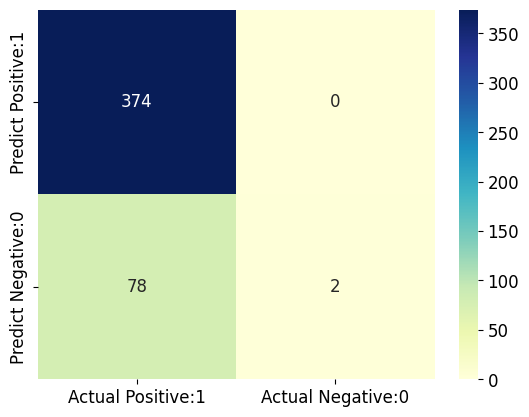

In [139]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Dokładność klasyfikatora


In [140]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8282


# Precyzja klasyfikatora

In [141]:
precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [142]:
y_pred1 = logreg.predict_proba(X_test)[:, 1]

# Krzywa ROC

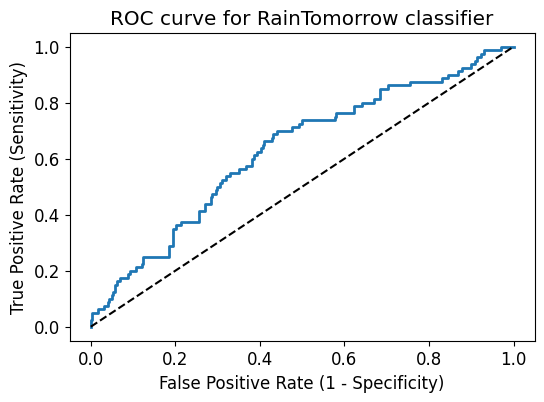

In [143]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label='Yes')

plt.figure(figsize=(6, 4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Eskport modelu

In [144]:
filename = "model.h5"
pickle.dump(logreg, open(filename, 'wb'))
with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)



In [145]:
total_features = len(numerical) - len(['Temp3pm', 'Temp9am', 'Humidity9am'])
total_features += 2
total_features += sum([len(x[column].unique()) for column in categorical])
print(total_features)

40
